In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
train.shape

(42000, 785)

In [3]:
test.shape

(28000, 784)

In [4]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
X_train = X_train / 255.0
test = test / 255.0

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [11]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=10)

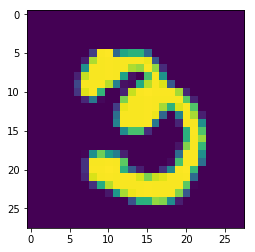

In [14]:
g = plt.imshow(X_train[0][:,:,0])

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(X_train, Y_train, batch_size = 86, epochs =70, validation_data = (X_val, Y_val), verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/70
37800/37800 [==============================] - 5s 119us/sample - loss: 0.2069 - acc: 0.9319 - val_loss: 0.0540 - val_acc: 0.9812
Epoch 2/70
37800/37800 [==============================] - 3s 67us/sample - loss: 0.0493 - acc: 0.9844 - val_loss: 0.0533 - val_acc: 0.9819
Epoch 3/70
37800/37800 [==============================] - 3s 68us/sample - loss: 0.0330 - acc: 0.9898 - val_loss: 0.0330 - val_acc: 0.9898
Epoch 4/70
37800/37800 [==============================] - 3s 67us/sample - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0455 - val_acc: 0.9871
Epoch 5/70
37800/37800 [==============================] - 3s 68us/sample - loss: 0.0180 - acc: 0.9948 - val_loss: 0.0416 - val_acc: 0.9883
Epoch 6/70
37800/37800 [==============================] - 3s 67us/sample - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0453 - val_acc: 0.9890
Epoch 7/70
37800/37800 [==============================] - 3s 68us/sample - loss: 0.0120 - acc: 0.9966 - val_loss: 0.

In [19]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_third.csv",index=False)